In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/escaperoom1/IcooonicWork.csv


# Intro


this notebook was dedicated to test data quality made by the ML department team of GDSC ESPRIT in order to be used in HACK2ESCAPE ,a hackthon organised by the club .The ML department team have used the results to identify any issues with the data and addressed them before the hackathon began. This  ensured that the data used in the hackathon is of high quality, and the teams participating in the hackathon had the best chance of producing useful insights and innovative solutions.

# Data Exploration

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt
import warnings # supress warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('/kaggle/input/escaperoom1/IcooonicWork.csv')
data.shape
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix



In [3]:
data.head(10)


,Identifier,Age,Height,Level of studies,Voice type,accent,Hair color,glasses,Body type,Tattoos,Gender,PK,food,JobInvolvement,WorkLifeBalance,jailexp
0,0.0,21.0,191.41,1.0,mid range,East Coast City Dialects,Missing,No,mesomorph,No,M,No,Pizza,8711,8711,1089.0
1,1.0,**??,194.91,------->?,deep,Southern American,white/gray,No,mesomorph,?,NB,No,Pizza,VeryHigh,4734,?
2,2.0,------->?,170.39,0.0,high pitched,Midwestern American,black,No,mesomorph,No,M,No,?,VeryHigh,7252,907.0
3,3.0,Missing,160.06,6.0,mid range,Southern American,brown,Yes,mesomorph,Yes,NB,Yes,Burger,8942,8942,?
4,4.0,19.0,187.54,3.0,deep,East Coast City Dialects,white/gray,No,ectomorph,Yes,M,No,Pizaa,VeryHigh,5080,635.0
5,5.0,53.0,148.04,6.0,deep,Missing,blond,Yes,Missing,No,NB,Yes,Burger,9599,9599,**??
6,------->?,25.0,150.14,7.0,mid range,Southern American,Missing,**??,ectomorph,Yes,M,Yes,Burger,Low,Bad,125.0
7,7.0,44.0,------->?,7.0,deep,Missing,blond,Yes,------->?,Yes,F,**??,Burger,8490,8490,------->?
8,8.0,?,163.23,8.0,deep,Boston,blond,Yes,mesomorph,Yes,F,Yes,Burger,VeryHigh,6757,1417.0
9,9.0,50.0,?,8.0,deep,Southern American,------->?,Yes,**??,Yes,?,Yes,Burger,VeryHigh,5133,1445.0


In [4]:
data.columns

Index(['Identifier', 'Age', 'Height', 'Level of studies', 'Voice type',
       'accent', 'Hair color', 'glasses', 'Body type', 'Tattoos', 'Gender',
       'PK', 'food', 'JobInvolvement', 'WorkLifeBalance', 'jailexp'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Identifier        1500 non-null   object
 1   Age               1500 non-null   object
 2   Height            1500 non-null   object
 3   Level of studies  1500 non-null   object
 4   Voice type        1500 non-null   object
 5   accent            1500 non-null   object
 6   Hair color        1500 non-null   object
 7   glasses           1500 non-null   object
 8   Body type         1500 non-null   object
 9   Tattoos           1500 non-null   object
 10  Gender            1500 non-null   object
 11  PK                1500 non-null   object
 12  food              1500 non-null   object
 13  JobInvolvement    1500 non-null   object
 14  WorkLifeBalance   1500 non-null   object
 15  jailexp           1500 non-null   object
dtypes: object(16)
memory usage: 187.6+ KB


In [6]:
data.describe()


,Identifier,Age,Height,Level of studies,Voice type,accent,Hair color,glasses,Body type,Tattoos,Gender,PK,food,JobInvolvement,WorkLifeBalance,jailexp
count,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
unique,1358,46,1224,15,7,16,10,6,7,7,8,6,9,389,977,754
top,------->?,24.0,**??,4.0,deep,Midwestern American,blond,Yes,mesomorph,No,M,Yes,Burger,VeryHigh,great,------->?
freq,42,86,40,247,665,270,380,725,576,683,605,814,674,589,210,197


In [7]:
data.isnull().sum()

Identifier          0
Age                 0
Height              0
Level of studies    0
Voice type          0
accent              0
Hair color          0
glasses             0
Body type           0
Tattoos             0
Gender              0
PK                  0
food                0
JobInvolvement      0
WorkLifeBalance     0
jailexp             0
dtype: int64

# Data Preparation 

In [8]:
data=data.drop("Identifier",axis=1)
data=data.drop("jailexp",axis=1)

In [9]:

for i in data.columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "Age":
 ['21.0' '**??' '------->?' 'Missing' '19.0' '53.0' '25.0' '44.0' '?'
 '50.0' '49.0' '47.0' '42.0' '26.0' '22.0' '38.0' '20.0' '30.0' '29.0'
 '18.0' '55.0' '23.0' '24.0' '54.0' '45.0' '43.0' '46.0' '33.0' '39.0'
 '32.0' '41.0' '34.0' '37.0' '27.0' '48.0' '52.0' '35.0' '36.0' '40.0'
 '31.0' '56.0' '51.0' '28.0' '150' '635' '-25']
unique values in "Height":
 ['191.41' '194.91' '170.39' ... '189.42' '170.89' '160.76']
unique values in "Level of studies":
 ['1.0' '------->?' '0.0' '6.0' '3.0' '7.0' '8.0' '?' '2.0' 'Missing' '5.0'
 '4.0' '**??' '1000' '422']
unique values in "Voice type":
 ['mid range' 'deep' 'high pitched' '?' '**??' '------->?' 'Missing']
unique values in "accent":
 ['East Coast City Dialects' 'Southern American' 'Midwestern American'
 'Missing' 'Boston' 'french' 'Northern Irish' 'Scottish' 'Welsh'
 'Yorkshire' '**??' '------->?' 'Canadian' 'Cockney' 'Italian' '?']
unique values in "Hair color":
 ['Missing' 'white/gray' 'black' 'brown' 'blond' '---

**Data cleaning**

In [10]:
for x in ('Age','Height','Level of studies'):
    data[x] = pd.to_numeric(data[x], errors='coerce')

In [11]:
#replace numerical values with nan in categorical columns
for x in ('JobInvolvement','WorkLifeBalance'):
    data[x] =data[x].where(data[x].str.match(r'\D+$', na=False))



**replacing outliers in categoricals features by Nan**

In [12]:

for x in ('JobInvolvement','WorkLifeBalance','Voice type', 'accent', 'Hair color', 'glasses', 'Body type', 'Tattoos', 'Gender','PK', 'food'):
        for i in ('?', '**??' ,'------->?' ,'Missing','*Burger'):
            data.loc[data[x]==i] = np.nan

    

In [13]:

for i in data.columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "Age":
 [ nan  19.  49.  53.  21.  42.  22.  38.  55.  43.  26.  39.  32.  24.
  54.  18.  34.  37.  27.  52.  46.  45.  36.  40.  20.  23.  35.  47.
  51.  33.  28.  31.  50.  56.  48.  29. 150.  25.  44.  30.  41. -25.]
unique values in "Height":
 [   nan 160.06 187.54 163.23 142.4  156.6  176.49 160.79 180.01 197.56
 169.26 204.29 140.61 164.07 161.33 198.38 201.65 159.94 151.74 174.73
 197.66 149.36 173.95 145.71 176.32 144.88 206.45 193.48 176.94 206.5
 161.04 158.86 166.4  182.54 166.68 165.56 153.29 166.27 145.01 142.64
 158.59 144.1  174.35 167.13 166.29 184.56 195.87 176.42 196.16 164.02
 181.45 161.8  177.15 153.4  207.95 159.47 174.2  160.64 199.35 193.98
 156.93 159.85 196.39 164.51 157.47 164.22 152.96 184.99 152.45 142.99
 162.1  166.22 143.84 192.29 164.28 149.22 193.83 150.41 171.48 188.74
 150.07 203.53 181.06 209.97 188.28 187.77 161.83 177.61 190.47 195.23
 163.62 156.34 145.   207.42 151.49 189.23 151.3  207.44 155.14 179.76
 154.97 196.46 158.95 14

**seprating features into categoricals & numericals**

In [14]:
numeric=[]
for i in data.columns:
    if data[i].dtype=='int64'or data[i].dtype=='float64' :
        numeric.append(i)

        

        
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
        

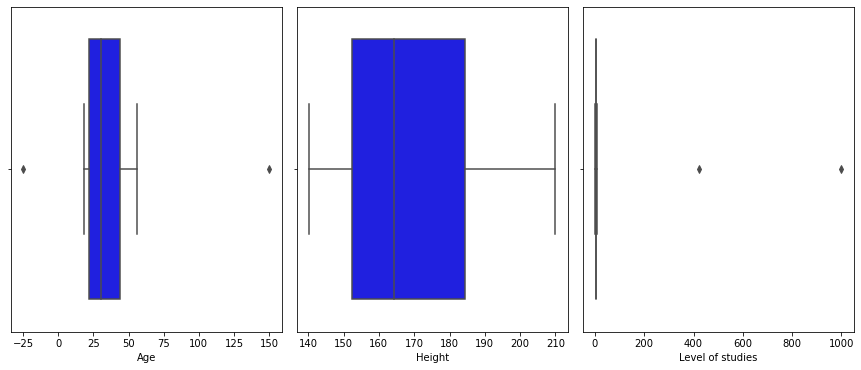

In [15]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numeric:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.boxplot(data[column],color="blue")
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

**replacing the outliers with nans for now**

In [16]:
for x in ['Age']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               516 non-null    float64
 1   Height            511 non-null    float64
 2   Level of studies  511 non-null    float64
 3   Voice type        571 non-null    object 
 4   accent            571 non-null    object 
 5   Hair color        571 non-null    object 
 6   glasses           571 non-null    object 
 7   Body type         571 non-null    object 
 8   Tattoos           571 non-null    object 
 9   Gender            571 non-null    object 
 10  PK                571 non-null    object 
 11  food              571 non-null    object 
 12  JobInvolvement    425 non-null    object 
 13  WorkLifeBalance   206 non-null    object 
dtypes: float64(3), object(11)
memory usage: 164.2+ KB


In [18]:

for i in data.columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "Age":
 [ nan  19.  49.  53.  21.  42.  22.  38.  55.  43.  26.  39.  32.  24.
  54.  18.  34.  37.  27.  52.  46.  45.  36.  40.  20.  23.  35.  47.
  51.  33.  28.  31.  50.  56.  48.  29. 150.  25.  44.  30.  41. -25.]
unique values in "Height":
 [   nan 160.06 187.54 163.23 142.4  156.6  176.49 160.79 180.01 197.56
 169.26 204.29 140.61 164.07 161.33 198.38 201.65 159.94 151.74 174.73
 197.66 149.36 173.95 145.71 176.32 144.88 206.45 193.48 176.94 206.5
 161.04 158.86 166.4  182.54 166.68 165.56 153.29 166.27 145.01 142.64
 158.59 144.1  174.35 167.13 166.29 184.56 195.87 176.42 196.16 164.02
 181.45 161.8  177.15 153.4  207.95 159.47 174.2  160.64 199.35 193.98
 156.93 159.85 196.39 164.51 157.47 164.22 152.96 184.99 152.45 142.99
 162.1  166.22 143.84 192.29 164.28 149.22 193.83 150.41 171.48 188.74
 150.07 203.53 181.06 209.97 188.28 187.77 161.83 177.61 190.47 195.23
 163.62 156.34 145.   207.42 151.49 189.23 151.3  207.44 155.14 179.76
 154.97 196.46 158.95 14

In [19]:
data.isna().sum()

Age                  984
Height               989
Level of studies     989
Voice type           929
accent               929
Hair color           929
glasses              929
Body type            929
Tattoos              929
Gender               929
PK                   929
food                 929
JobInvolvement      1075
WorkLifeBalance     1294
dtype: int64

In [20]:
for x in ['Height']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan
    


In [21]:
for x in ['Level of studies']:
    
 
    
    data.loc[data[x] >15,x] = np.nan
    
for x in ['Age']:
    
 
    
    data.loc[data[x] <0,x] = np.nan

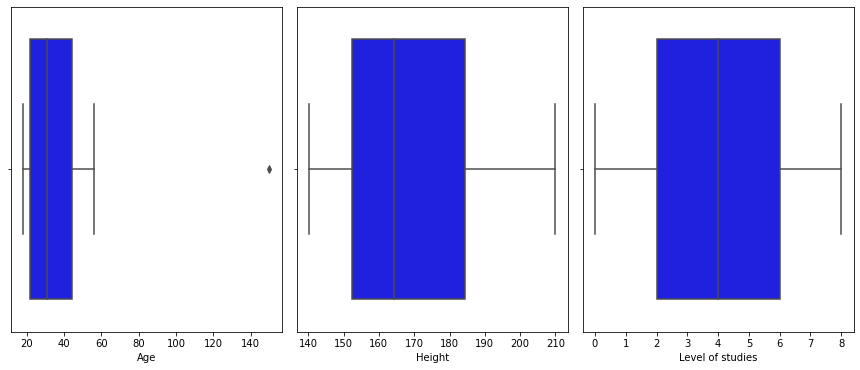

In [22]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numeric:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.boxplot(data[column],color="blue")
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

**data visualizing**

Text(0.5, 0, 'jailexp')

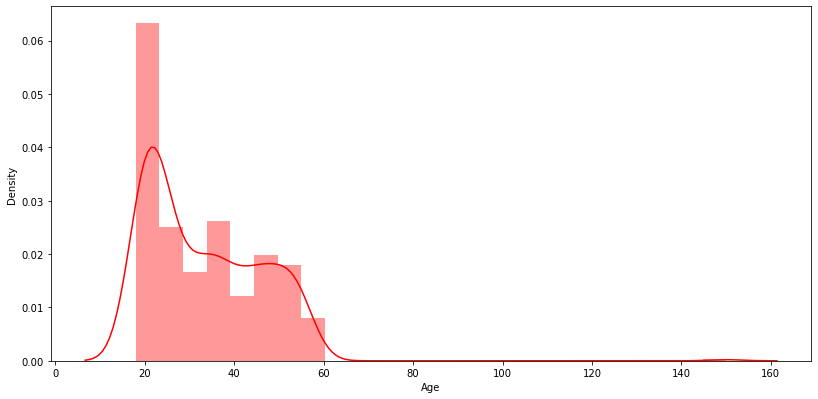

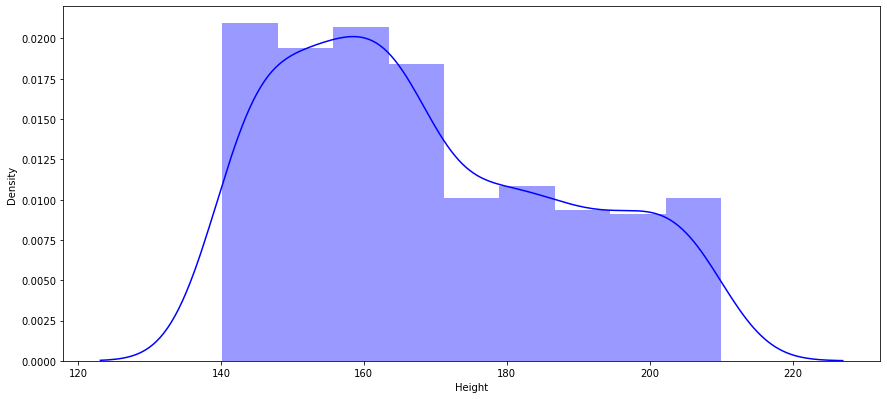

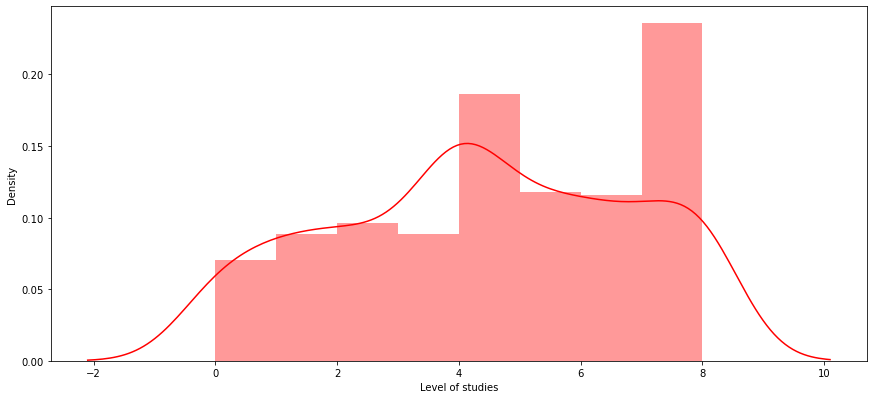

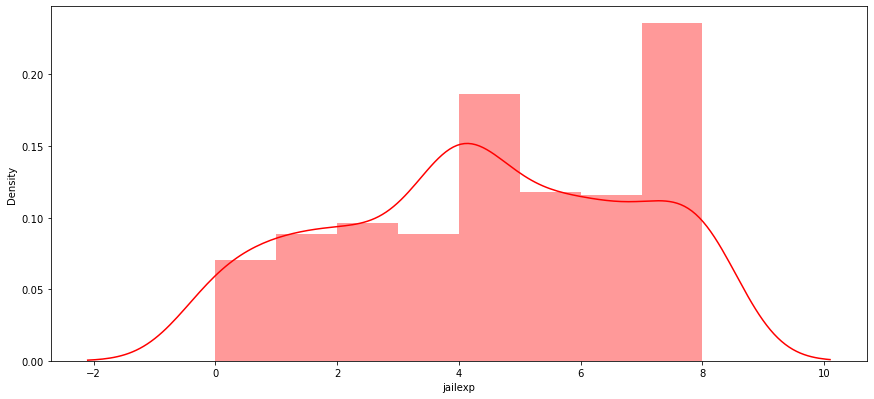

In [23]:
plt.figure(figsize = (30, 30))
ax = plt.subplot(4, 2, plotnumber)
sns.distplot(data['Age'],color="red")
plt.xlabel('Age')

plt.figure(figsize = (30, 30))
ax = plt.subplot(4, 2 , plotnumber)
plt.subplots_adjust(wspace=0.05)
sns.distplot(data['Height'],color="blue")
plt.xlabel('Height')



plt.figure(figsize = (30, 30))
ax = plt.subplot(4, 2 , plotnumber)
plt.subplots_adjust(wspace=0.05)
sns.distplot(data['Level of studies'],color="red")
plt.xlabel('Level of studies')

plt.figure(figsize = (30, 30))
ax = plt.subplot(4, 2 , plotnumber)
plt.subplots_adjust(wspace=0.05)
sns.distplot(data['Level of studies'],color="red")
plt.xlabel('jailexp')



in some features,the NAN aws detected as a value  

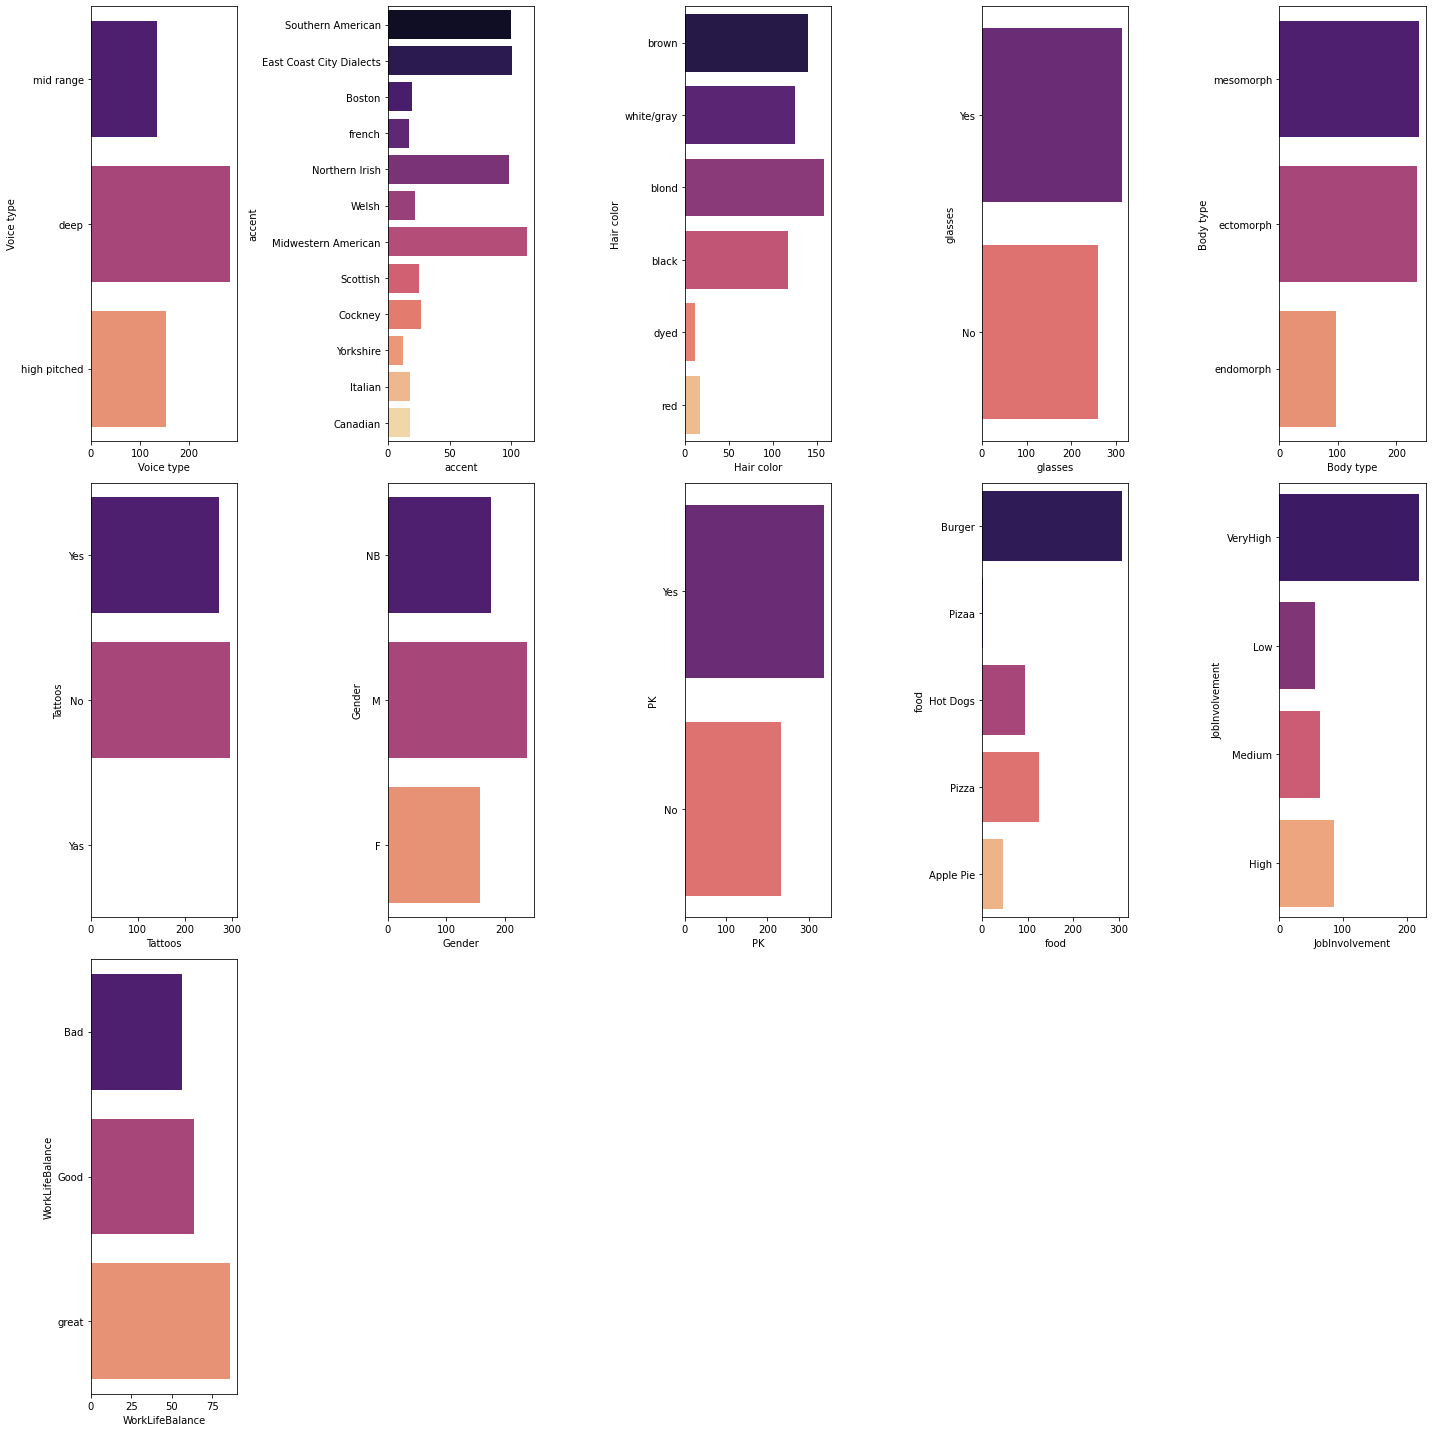

In [24]:
plt.figure(figsize = (20, 20))#visualizing categoricals using countplots
plotnumber = 1

for column in categoricals:
    if plotnumber <= 12:
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(y=data[column], palette = 'magma') 
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

**the numeric data isn't skewed so we are going to replace the missing values with mean-value and the categorical data is going to be replaced with mode**

In [25]:
for column in numeric:
 data[column] = data[column].fillna(data[column].mean())

In [26]:
for column in categoricals:
  data[column] = data[column].fillna(data[column].mode()[0])

In [27]:
data.isnull().sum()

Age                 0
Height              0
Level of studies    0
Voice type          0
accent              0
Hair color          0
glasses             0
Body type           0
Tattoos             0
Gender              0
PK                  0
food                0
JobInvolvement      0
WorkLifeBalance     0
dtype: int64

**label encoder**

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categoricals:
    data[col]=encoder.fit_transform(data[col])
    
lbdata=data

**heatmap**

<AxesSubplot:>

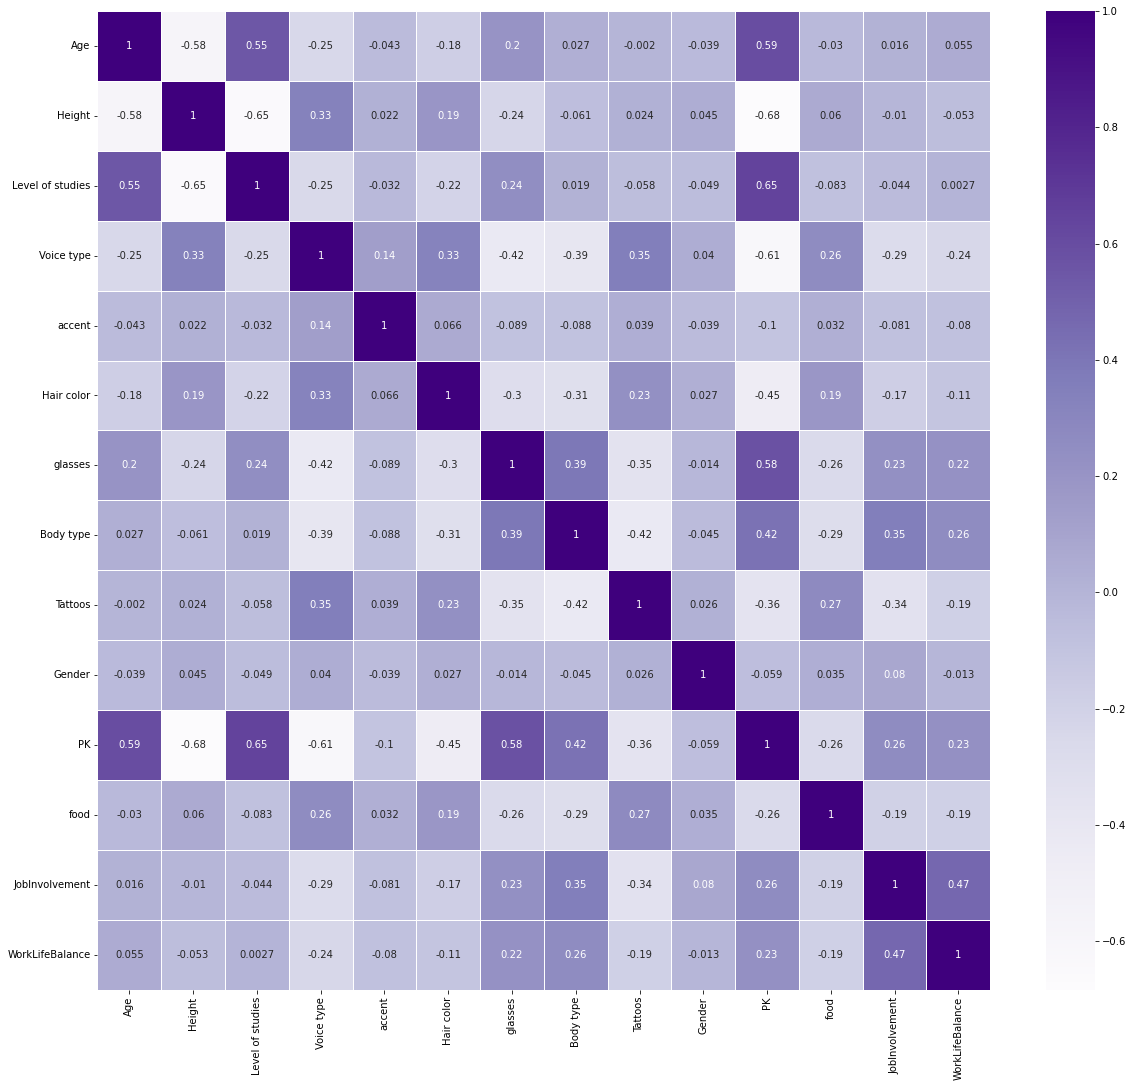

In [29]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), annot=True,linewidths=.5, cmap="Purples")

**Robust Scaling**

In [30]:
from sklearn.preprocessing import RobustScaler
RS=RobustScaler()
arr = RS.fit_transform(data)
Rscaled_data = pd.DataFrame(arr, columns=data.columns)
Rscaled_data

,Age,Height,Level of studies,Voice type,accent,Hair color,glasses,Body type,Tattoos,Gender,PK,food,JobInvolvement,WorkLifeBalance
0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,-8.52456,1.640472,2.0,3.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
4,-14.149515,18.95544,-1.359528,0.0,-2.0,4.0,-1.0,-2.0,2.0,0.0,-1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,13.850485,-13.74456,2.640472,0.0,-2.0,4.0,0.0,-2.0,0.0,1.0,0.0,0.0,-1.0,-1.0
1498,-10.149515,2.30544,-1.359528,1.0,-5.0,0.0,-1.0,-2.0,2.0,1.0,-1.0,0.0,0.0,0.0


# Modeling

**logistic regression**

In [31]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y = Rscaled_data['PK']
X = Rscaled_data.drop(['PK'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))



Logistic Regression accuracy score with all the features: 0.9967
              precision    recall  f1-score   support

        -1.0       1.00      0.98      0.99        47
         0.0       1.00      1.00      1.00       253

    accuracy                           1.00       300
   macro avg       1.00      0.99      0.99       300
weighted avg       1.00      1.00      1.00       300



In [32]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full')
#apply
X_train = pca.fit_transform(X_train)
#number of components
print(pca.n_components_) 
pca.explained_variance_ratio_

13


array([7.91235655e-01, 1.69225619e-01, 1.19574166e-02, 8.77228977e-03,
       5.07452421e-03, 4.23843349e-03, 2.77334000e-03, 1.99027375e-03,
       1.50840532e-03, 1.13946482e-03, 1.01217749e-03, 6.23020449e-04,
       4.49380333e-04])

Logistic Regression accuracy score with the first 16 features: 0.9978
              precision    recall  f1-score   support

        -1.0       1.00      0.99      0.99        69
         0.0       1.00      1.00      1.00       381

    accuracy                           1.00       450
   macro avg       1.00      0.99      1.00       450
weighted avg       1.00      1.00      1.00       450



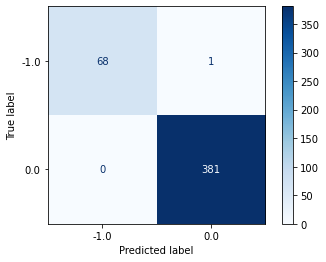

In [33]:
y = Rscaled_data['PK']
X = Rscaled_data.drop(['PK'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 16 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

**decision tree**

 train score  : 1.0
 test score  : 0.9933333333333333


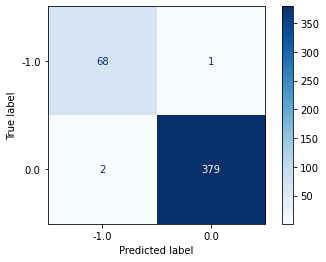

In [34]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)
knn = KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)
from sklearn.tree import DecisionTreeClassifier 
y = Rscaled_data['PK']
X = Rscaled_data.drop(['PK'], axis=1)

oversample = SMOTE()
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)
X

dt = DecisionTreeClassifier()
dtree = dt.fit(X_train_res,y_train_res)
y_pred_dt = dt.predict(X_test)
print(' train score  :', dt.score(X_train_res, y_train_res))
print(' test score  :', dt.score(X_test, y_test))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

**KNN Classifier**

              precision    recall  f1-score   support

        -1.0       1.00      0.97      0.99        69
         0.0       0.99      1.00      1.00       381

    accuracy                           1.00       450
   macro avg       1.00      0.99      0.99       450
weighted avg       1.00      1.00      1.00       450



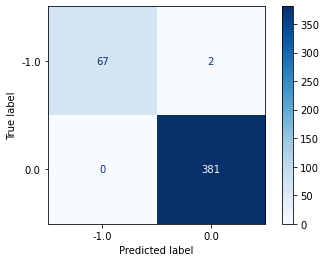

In [35]:
from sklearn.neighbors import KNeighborsClassifier
y = Rscaled_data['PK']
X = Rscaled_data.drop(['PK'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# model fit
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# prediction
preds = knn.predict(X_test)
print(classification_report(y_test, preds))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.show()


**SVC**

              precision    recall  f1-score   support

        -1.0       1.00      0.83      0.90        69
         0.0       0.97      1.00      0.98       381

    accuracy                           0.97       450
   macro avg       0.98      0.91      0.94       450
weighted avg       0.97      0.97      0.97       450



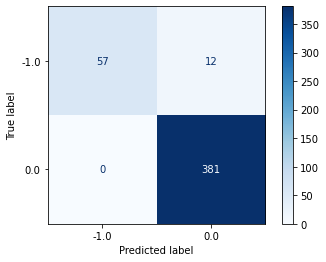

In [36]:
from sklearn.svm import SVC
# model fit
knn = SVC(gamma=0.1, C=1000)
knn.fit(X_train, y_train)

# prediction
preds = knn.predict(X_test)
print(classification_report(y_test, preds))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

**Naive bayes**

              precision    recall  f1-score   support

        -1.0       0.81      1.00      0.90        69
         0.0       1.00      0.96      0.98       381

    accuracy                           0.96       450
   macro avg       0.91      0.98      0.94       450
weighted avg       0.97      0.96      0.97       450



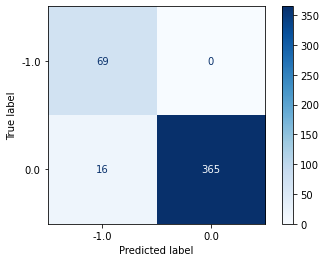

In [37]:
# model fit
knn = GaussianNB()
knn.fit(X_train, y_train)

# prediction
preds = knn.predict(X_test)
print(classification_report(y_test, preds))


plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

**Randomforest**

              precision    recall  f1-score   support

        -1.0       1.00      0.99      0.99        69
         0.0       1.00      1.00      1.00       381

    accuracy                           1.00       450
   macro avg       1.00      0.99      1.00       450
weighted avg       1.00      1.00      1.00       450



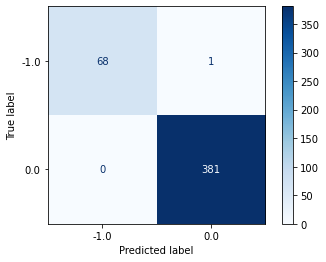

In [38]:
# model fit
knn = RandomForestClassifier()
knn.fit(X_train, y_train)

# prediction
preds = knn.predict(X_test)
print(classification_report(y_test, preds))

plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

**adaboost**

              precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99        69
         0.0       1.00      1.00      1.00       381

    accuracy                           1.00       450
   macro avg       0.99      0.99      0.99       450
weighted avg       1.00      1.00      1.00       450

 train score  : 1.0
 test score  : 0.9955555555555555


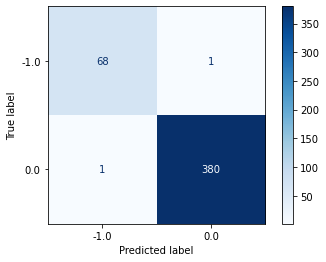

In [39]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)


# prediction
preds = adb.predict(X_test)
print(classification_report(y_test, preds))
print(' train score  :', adb.score(X_train, y_train))
print(' test score  :', adb.score(X_test, y_test))
plot_confusion_matrix(adb, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

**KNN WITH SMOTE**

              precision    recall  f1-score   support

        -1.0       0.97      0.99      0.98        69
         0.0       1.00      0.99      1.00       381

    accuracy                           0.99       450
   macro avg       0.98      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

 train score  : 0.9961904761904762
 test score  : 0.9933333333333333


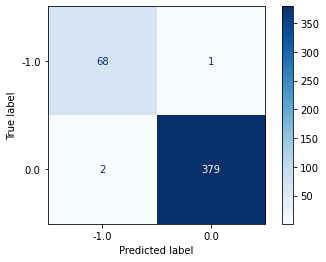

In [40]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)
knn = KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)

# prediction
preds = knn.predict(X_test)
print(classification_report(y_test, preds))
print(' train score  :', knn.score(X_train, y_train))
print(' test score  :', knn.score(X_test, y_test))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

**XGBOOST**

In [41]:
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.feature_selection import RFE
#build an XGBoost model
model = XGBRegressor()
# create the RFE model and select 8 attributes
rfe = RFE(estimator=model,n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))


Selected features: ['Age', 'Height', 'Level of studies', 'Voice type', 'accent', 'Hair color', 'Gender', 'WorkLifeBalance']


**MLPClassifier**

              precision    recall  f1-score   support

        -1.0       1.00      0.99      0.99        69
         0.0       1.00      1.00      1.00       381

    accuracy                           1.00       450
   macro avg       1.00      0.99      1.00       450
weighted avg       1.00      1.00      1.00       450

 train score  : 1.0
 test score  : 0.9977777777777778


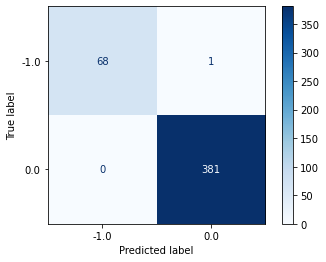

In [42]:

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)
preds = clf.predict(X_test)
print(classification_report(y_test, preds))
print(' train score  :', clf.score(X_train, y_train))
print(' test score  :', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

**crossvalidation**

In [43]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
random_state = 0
classifiers = []


classifiers.append(KNeighborsClassifier())
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(GaussianNB())
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier()))
classifiers.append(RandomForestClassifier())

# Evaluation

In [44]:
from sklearn.model_selection import cross_val_score
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res_1 = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["KNN","SVC","DecisionTree","GNB","AdaBoost",
"RandomForest"]})

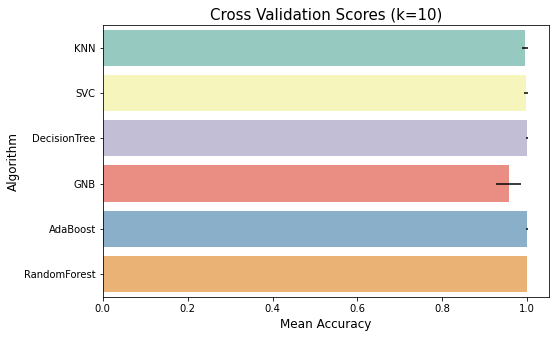

In [45]:
plt.figure(figsize = (8,5))
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res_1, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_ylabel("Algorithm", fontsize = 12)
g.set_xlabel("Mean Accuracy", fontsize = 12)
g = g.set_title("Cross Validation Scores (k=10)", fontsize=15)
plt.show()

**seems like the previous scores only means that we are facing an overfitting problem even after using features selection this problem is still standing  
so probably our data isn't fit for classification models**  

****